In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.model.train_and_eval import train, train_with_parameter
from src.visualization.plot_functions import (
    plot_expected_values,
    plot_states,
    plot_loss_functions,
    plot_learned_param,
    plot_fidelity
)

from src.data_simulation.jaynes_cummings_data import data_jc

import numpy as np

In [2]:
# y_train, expect, hamiltonian, operators_list, time = data_jc(
#     params={"wc": 1.0, "wa": 1.0, "g": 0.1},
#     tfinal=20.0,
#     n_time_steps=200,
#     init_state="fock_superposition",
#     picture="atom",
#     dims={"atom": 2, "field": 2},
# )

In [3]:
# params = [1, 1, 0.1]  # wc, wa, g
# params = [1, 0.1, 0.3]
params = {"wc": 1.0, "wa": 1.0, "g": 0.1}
tfinal = 20.0
n_time_steps = 200
init_state = "fock"
dims = {"atom": 2, "field": 2}
picture = "atom"
epochs = 500

In [4]:
# PARA APRENDER O ESTADO E O PARÂMETRO

models_dict, loss_dict = train_with_parameter(
    epochs=epochs,
    params=params,
    tfinal=tfinal,
    n_time_steps=n_time_steps,
    init_state=init_state,
    picture=picture,
    dims=dims,
    n_points_loss=100,
)

/Users/rodrigosilva/Documents/Mestrado/pinn-effective-hamiltonian/.venv/lib/python3.9/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
100%|██████████| 500/500 [00:02<00:00, 213.51it/s]


/Users/rodrigosilva/Documents/Mestrado/pinn-effective-hamiltonian/src/visualization/plot_functions.py:139: RuntimeWarning: divide by zero encountered in divide
  error = (


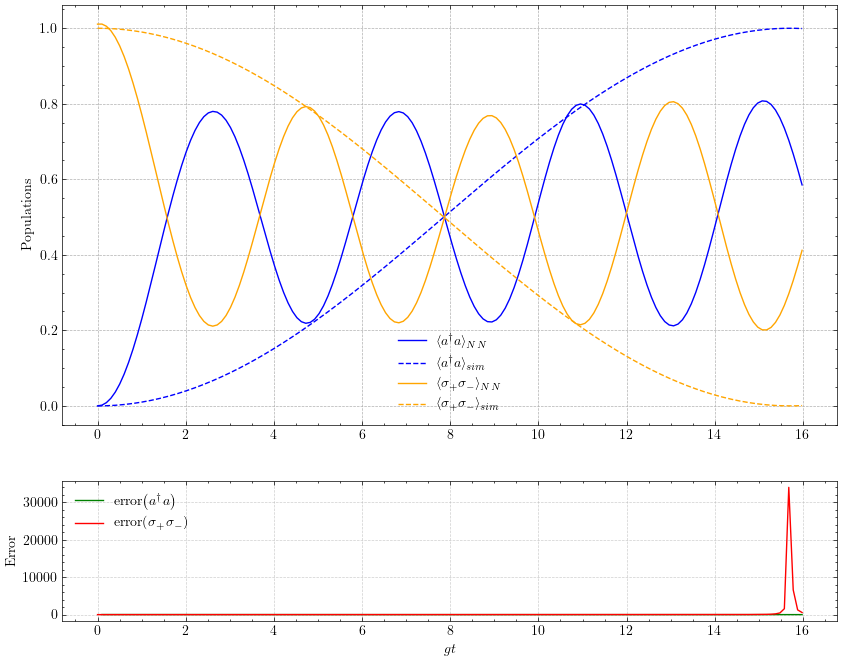

In [5]:
plot_expected_values(
    models_dict,
    tfinal,
    n_time_steps,
    init_state,
    params,
    picture,
    dims,
    train_or_test="train",
    plot_input="expected",
)

/Users/rodrigosilva/Documents/Mestrado/pinn-effective-hamiltonian/.venv/lib/python3.9/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


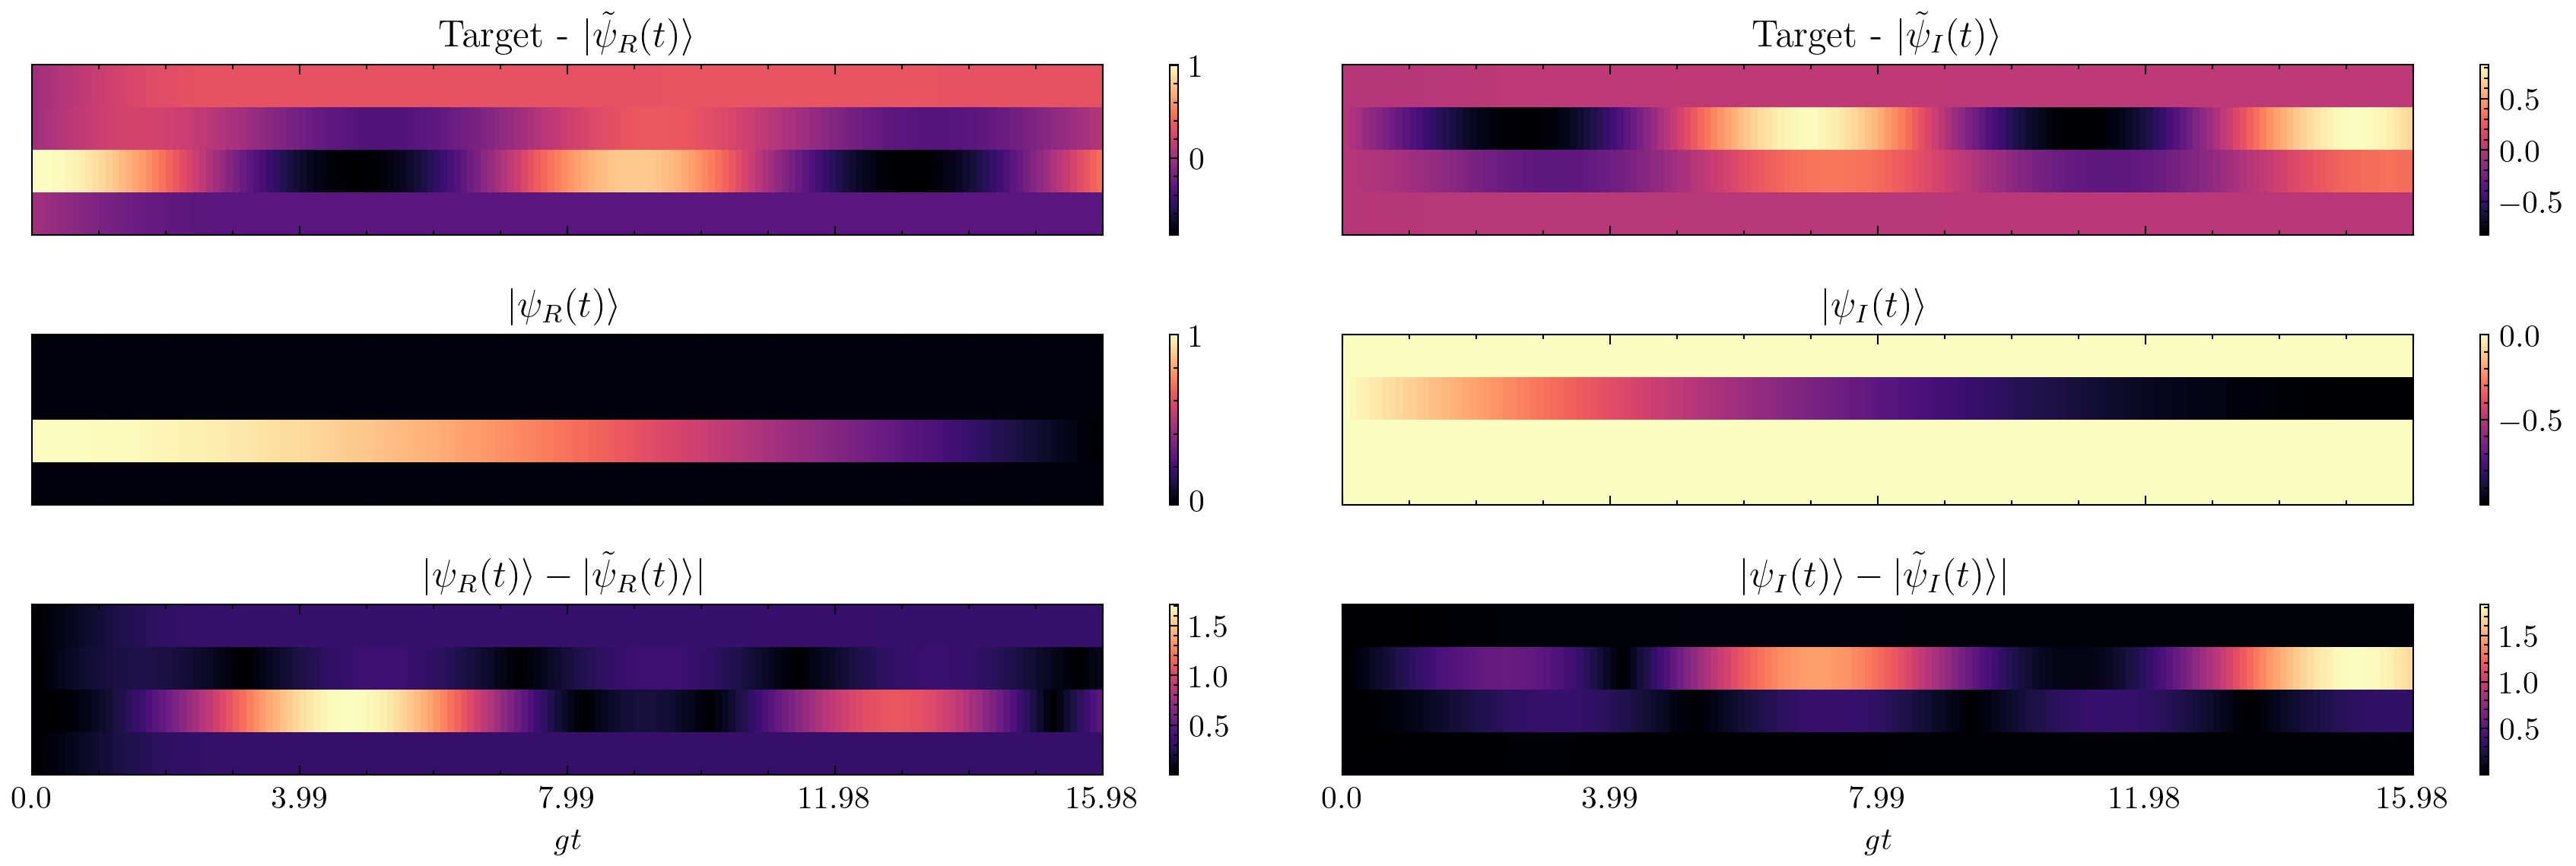

In [6]:
plot_states(
    models_dict,
    params,
    tfinal,
    init_state=init_state,
    dims=dims,
    n_time_steps=200,
    picture=picture,
    train_or_test="train",
    plot_input="state",
)

In [7]:
# plot_states(
#     models_dict,
#     params,
#     tfinal,
#     init_state=init_state,
#     dims=dims,
#     n_time_steps=200,
#     picture=picture,
#     train_or_test="test",
#     plot_input="state",
# )

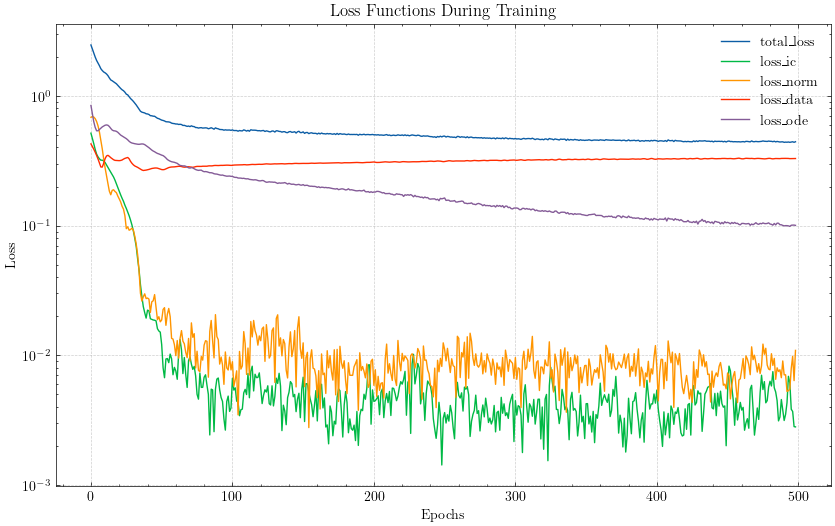

In [8]:
plot_loss_functions(loss_dict, skip_param=300)

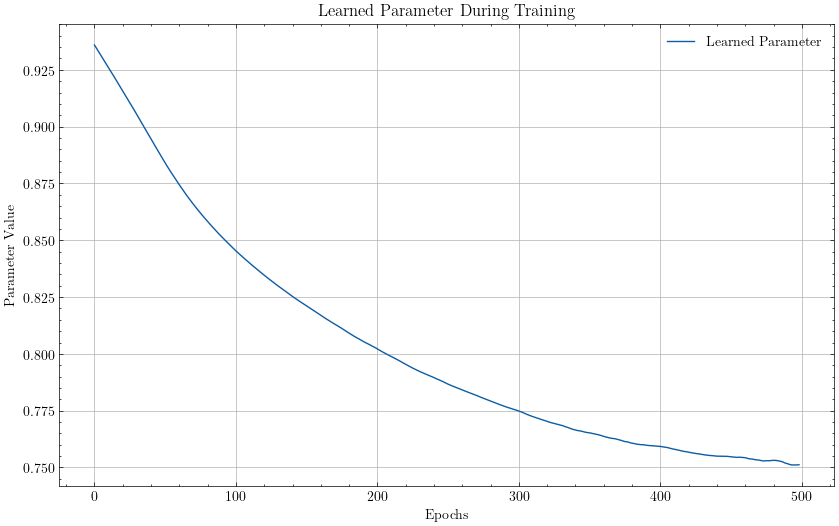

In [9]:
plot_learned_param(loss_dict, skip_param=300)

/Users/rodrigosilva/Documents/Mestrado/pinn-effective-hamiltonian/.venv/lib/python3.9/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


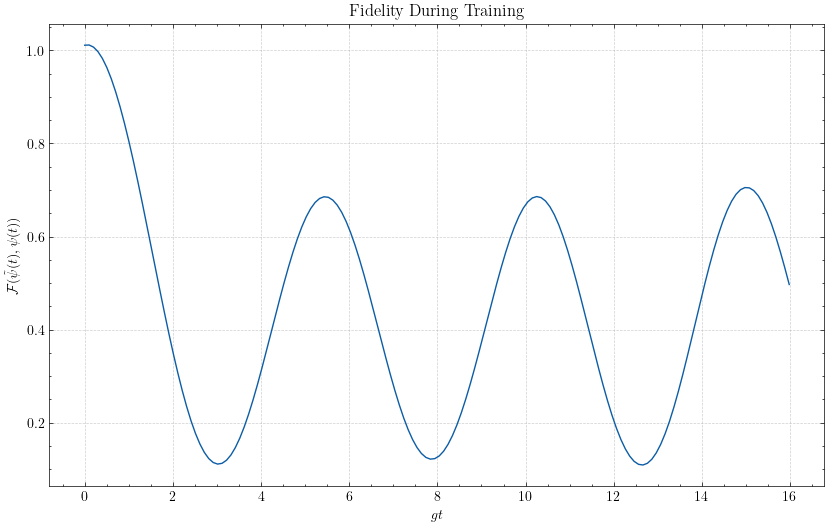

In [10]:
plot_fidelity(
    models_dict,
    params,
    tfinal,
    init_state=init_state,
    dims=dims,
    n_time_steps=200,
    picture=picture,
    train_or_test="train",
    plot_input="state",
)